## Figs for the measurement force paper

In [1]:
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
def cm2inch(value):
    return value/2.54

#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')



mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.5
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def pdf(data, bins = 10, density = True):
    
    pdf, bins_edge = np.histogram(data, bins = bins, density = density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2
    
    return pdf, bins_center 

In [12]:
25e-4 / (4e-21 / (6*np.pi*0.001*1.5e-6)) * 1e-12 / 2

0.008835729338221293

In [2]:
#import the plots data
dataset = loadmat("data_graphs.mat")
for i in dataset.keys():
    try:
        dataset[i] = np.squeeze(dataset[i])
    except:
        continue
        
fit_data = loadmat("data_fit_2705.mat")
for i in fit_data.keys():
    try:
        fit_data[i] = np.squeeze(fit_data[i])
    except:
        continue
        

            

In [3]:
x = dataset["x"] 
y = dataset["y"]
z = dataset["z"]- np.min(dataset["z"])

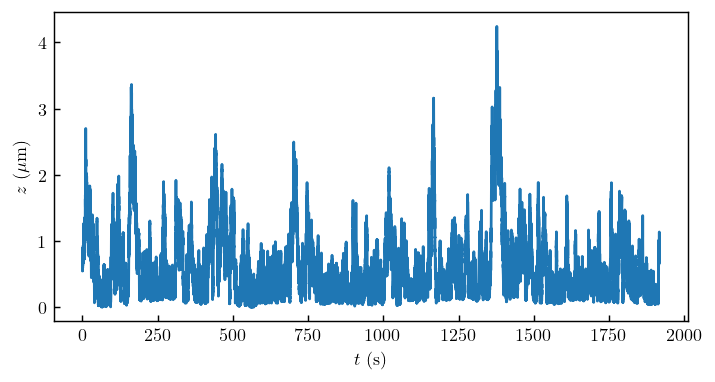

In [6]:
plt.figure(figsize = (cm2inch(16), cm2inch(8)))
plt.plot(dataset["time"], z)
plt.xlabel("$t$ (s)", fontsize = "medium")
plt.ylabel("$z$ $(\mathrm{\mu m})$", fontsize = "medium")
plt.savefig('traj_z.pdf')

Text(0, 0.5, '$P(\\Delta z / \\sigma)$')

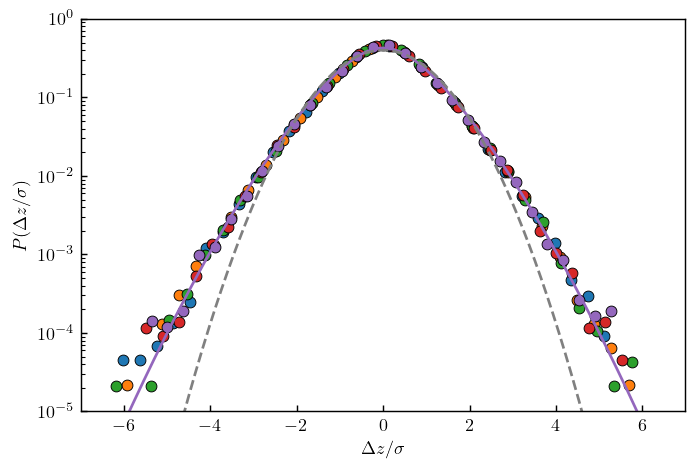

In [4]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.figure()

for n,i in enumerate(['pdf_Dz_short_t_1', 'pdf_Dz_short_t_2', 'pdf_Dz_short_t_3', 'pdf_Dz_short_t_4', 'pdf_Dz_short_t_5']):
    plt.semilogy(dataset[i][0,:],dataset[i][1,:], color = color[n], marker =  "o", linestyle = "")

    
plt.plot(dataset["pdf_Dz_short_th_t_5"][0,:],dataset["pdf_Dz_short_th_t_5"][1,:], color = color[4])
plt.plot(dataset["gaussian_short_timetheory_z"][0,:],dataset["gaussian_short_timetheory_z"][1,:], color = "gray",linestyle = "--")

ax = plt.gca()
ax.set_ylim([1e-5,1])
ax.set_xlim([-7,7])
plt.xlabel("$\Delta z / \sigma$")
plt.ylabel("$P(\Delta z / \sigma)$")

In [5]:
#dataset

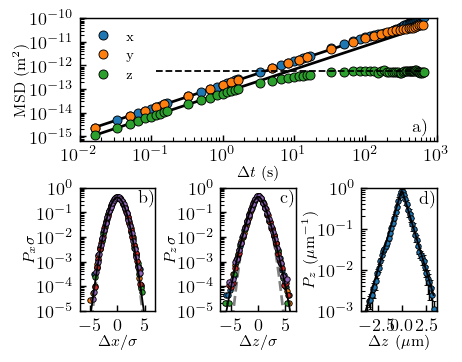

In [6]:
fig = plt.figure(figsize=(cm2inch(8.6), cm2inch(8.6)/1.68*1.3),constrained_layout=False)
gs = fig.add_gridspec(2,3)

##### MSD


fig.add_subplot(gs[0,:])



plt.loglog(dataset["MSD_time_tot"], dataset["MSD_fit_x"], color = "k")
plt.loglog(dataset["MSD_time_tot"], dataset["MSD_fit_z"], color = "k")

plt.loglog(dataset["MSD_time_tot"],dataset["MSD_x_tot"],"o", label = "x", markersize = 5)
plt.loglog(dataset["MSD_time_tot"][::2],dataset["MSD_y_tot"][::2],"o", label = "y", markersize = 5)
plt.loglog(dataset["MSD_time_tot"],dataset["MSD_z_tot"],"o", label = "z", markersize = 5)




# plateau

plateau = [dataset["fitted_MSD_Plateau"] for i in range(len(dataset["MSD_time_tot"]))]
plt.loglog(dataset["MSD_time_tot"][-60:], plateau[-60:], color = "black", linewidth = 1,zorder = 10, linestyle = "--")
                               
    
##
ax = plt.gca()
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())


ax.set_xlim([1e-2,1e3])
ax.set_ylim([None,1e-10])


ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

plt.text(0.45*xmax,2.5*ymin,'a)')


plt.ylabel("$\mathrm{MSD}$ ($\mathrm{m^2}$)",fontsize = "small", labelpad=0.5)
plt.xlabel("$\Delta t$ (s)",fontsize = "small",labelpad=0.5)

plt.legend(frameon = False,fontsize = "x-small",loc = "upper left")

####### SHORT TIME X



fig.add_subplot(gs[1,0])

for n,i in enumerate(['pdf_Dx_short_t_1', 'pdf_Dx_short_t_2', 'pdf_Dx_short_t_3', 'pdf_Dx_short_t_4', 'pdf_Dx_short_t_5']):
    plt.semilogy(dataset[i][0,:],dataset[i][1,:], color = color[n], marker =  "o", linestyle = "",markersize = 3)

    
plt.plot(dataset["pdf_Dx_short_th_t_5"][0,:],dataset["pdf_Dx_short_th_t_5"][1,:], color = "k",zorder=6,linewidth=1)
plt.plot(dataset["gaussianx_short_timetheory"][0,:],dataset["gaussianx_short_timetheory"][1,:], color = "gray",zorder=-1,linestyle = "--",)

ax = plt.gca()

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())




ax.set_ylim([1e-5,1])
ax.set_xlim([-7,7])
plt.xlabel("$\Delta x / \sigma$",fontsize = "small", labelpad=0.5)
plt.ylabel("$P_{x}  \sigma$",fontsize = "small", labelpad=0.5)

ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

plt.text(0.54*xmax,0.25*ymax,'b)')


####### SHORT TIME Z



fig.add_subplot(gs[1,1])

for n,i in enumerate(['pdf_Dz_short_t_1', 'pdf_Dz_short_t_2', 'pdf_Dz_short_t_3', 'pdf_Dz_short_t_4', 'pdf_Dz_short_t_5']):
    plt.semilogy(dataset[i][0,:],dataset[i][1,:], color = color[n], marker =  "o", linestyle = "",markersize = 3)

    
plt.plot(dataset["pdf_Dz_short_th_t_5"][0,:],dataset["pdf_Dz_short_th_t_5"][1,:], color = "k",zorder=6,linewidth=1)
plt.plot(dataset["gaussian_short_timetheory_z"][0,:],dataset["gaussian_short_timetheory_z"][1,:], color = "gray",zorder=-1,linestyle = "--",)

ax = plt.gca()

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())




ax.set_ylim([1e-5,1])
ax.set_xlim([-7,7])
plt.xlabel("$\Delta z / \sigma$",fontsize = "small",labelpad=0.5)
plt.ylabel("$P_{z} \sigma$",fontsize = "small",labelpad=0.5)

ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

plt.text(0.58*xmax,0.25*ymax,'c)')
###### LONG TIME PDF\


fig.add_subplot(gs[1,2])

plt.errorbar(dataset["x_pdf_longtime"]*1e6,dataset["pdf_longtime"],yerr=dataset["err_long_t"],ecolor = "k",barsabove=False,linewidth = 0.8, label = "experimental pdf",marker="o", markersize=3,capsize = 1,linestyle="")
#plt.fill_between(bins_centers_long_t, pdf_long_t-err_long_t, pdf_long_t+err_long_t, alpha = 0.3)
plt.semilogy(dataset["bins_centers_long_t"],dataset["Pdeltaz_long_th"],color="black", linewidth = 1, zorder=10)


plt.ylabel("$P_z$ ($\mathrm{\mu m^{-1}})$",fontsize = "small", labelpad=0.5)
plt.xlabel("$\Delta z$ ($\mathrm{\mu m}$)",fontsize = "small", labelpad=0.5)

ax = plt.gca()

ax = plt.gca()

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())


ax.set_ylim([1e-3,1])
#ax.set_xlim([None,1e-10])

ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

plt.text(0.5*xmax,0.4*ymax,'d)')



plt.tight_layout(pad = 0.1,h_pad=0.1, w_pad=0.3)

#plt.savefig("MSD_displacements.svg")

In [7]:
#dataset

In [8]:

def P_b_off(z,z_off,  B, ld, lb):
    z_off = z_off * 1e-6 
    lb = lb * 1e-9
    ld = ld * 1e-9
    z = z - z_off
    P_b = np.exp(-B * np.exp(-z / (ld)) - z / lb)
    P_b[z < 0] = 0
    
    # Normalization of P_b
    
    A = trapz(P_b,z * 1e6)
    P_b = P_b / A
    
    
    return P_b

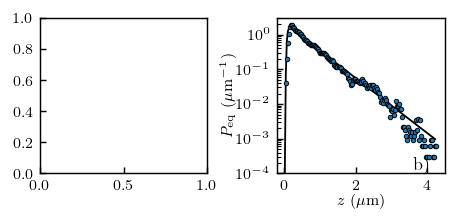

In [16]:
fig = plt.figure(figsize=(cm2inch(8.6), 0.75*cm2inch(8.6)/1.68),constrained_layout=False)
gs = fig.add_gridspec(1,2)

fig.add_subplot(gs[0,0])



#########

def pdf(data, bins = 10, density = True):
    
    pdf, bins_edge = np.histogram(data, bins = bins, density = density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2
    
    return pdf, bins_center 


pdf_z,bins_center = pdf(dataset["z"]- np.min(dataset["z"]),bins = 150)


def logarithmic_hist(data,begin,stop,num = 50,base = 2):
    
    if begin == 0:
        beg = stop/num
        bins = np.logspace(np.log(beg)/np.log(base), np.log(stop)/np.log(base), num-1, base=base)
        widths = (bins[1:] - bins[:-1])
        #bins = np.cumsum(widths[::-1])
        bins = np.concatenate(([0],bins))
        #widths = (bins[1:] - bins[:-1])
    
    else:
        bins = np.logspace(np.log(begin)/np.log(base), np.log(stop)/np.log(base), num, base=base)
        widths = (bins[1:] - bins[:-1])
    
    hist,a= np.histogram(data, bins=bins,density=True)
    # normalize by bin width
    bins_center = (bins[1:] + bins[:-1])/2
    
    return bins_center,widths, hist



#bins_center_pdf_z,widths,hist = logarithmic_hist(z_0offset, 0.000001, 3, num = 31,base=2)


#pdf_z, bins_center_pdf_z = pdf(z_dedrift[z_dedrift < 3],  bins = 100)
#bins_center,widths, pdf_z = logarithmic_hist(dataset["z"]-np.mean(dataset["z"]),0.0001,4,num = 10,base = 10)

P_b_th = P_b_off(bins_center*1e-6, 0, dataset["B"], dataset["ld"], dataset["lb"])



fig.add_subplot(gs[0,1])

plt.plot(bins_center,P_b_th/trapz(P_b_th,bins_center),color = "k",linewidth=1)
plt.semilogy(bins_center - dataset["offset_B"],pdf_z, "o", markersize = 2.5)

plt.xlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "small", labelpad=0.5)
plt.ylabel("$P_{\mathrm{eq}}$ ($\mathrm{\mu m  ^{-1}}$)",fontsize = "small", labelpad=0.5)

ax = plt.gca()
ax.set_ylim([1e-4,3])
ax.set_xlim([-0.2,4.5])
#plt.xticks([0,1,2,3,4])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()



plt.text(0.8*xmax,1.2*ymin,'b)')

plt.tight_layout(pad = 0.01,h_pad=0.001, w_pad=0.1)

plt.savefig("viscosityxpdfz.svg")

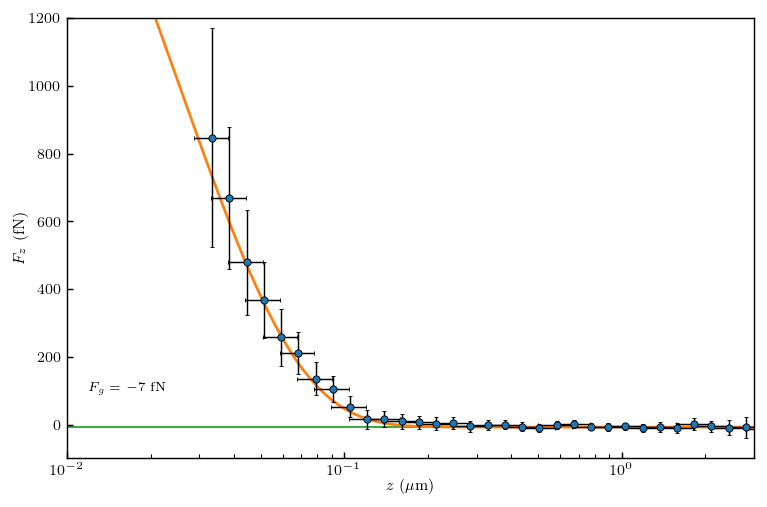

In [17]:
#fig = plt.figure(figsize=(cm2inch(8.6), cm2inch(8.6)/1.68),constrained_layout=False)

plt.errorbar(dataset["z_Force"]*1e6, dataset["Force"]*1e15,yerr=2*np.sqrt(2)*dataset["err_Force"]*1e15,xerr=dataset["x_err_Force"],ecolor = "k", linestyle="", marker="o", markersize = 4,linewidth = 0.8, capsize=1,zorder=3)
plt.semilogx(dataset["z_Force_th"]*1e6,dataset["Force_th"]*1e15)

plt.plot(np.linspace(1e-2,2,10), np.ones(10) * np.mean(dataset["Force"][-10:]*1e15),zorder=-4,linewidth=1)
ax = plt.gca()
ax.set_ylim([-100,1200])
ax.set_xlim([0.1e-1,3])
plt.ylabel("$F_z$ $\\mathrm{(fN)}$",fontsize = "small", labelpad=0.5)
plt.xlabel("$z$ $(\\mathrm{\mu m})$",fontsize = "small", labelpad=0.5)


plt.text(1.2e-2,100, "$F_g = -7 ~ \mathrm{fN}$ ",fontsize="x-small")

plt.tight_layout()
#plt.savefig("Force.pdf")


In [18]:
fig = plt.figure(figsize=(cm2inch(8.6), 0.75*cm2inch(8.6)/1.68),constrained_layout=False)

gs = fig.add_gridspec(1,5)

fig.add_subplot(gs[0,:2])

z_th = np.linspace(10e-9,10e-6,100)

#plt.errorbar(z_D_para_fit, D_para_fit/Do, yerr = err_d_para_fit/Do, linewidth = 3, marker = "x", linestyle = "",color = "tab:red", label = "$D_ \\parallel$")
plt.loglog(z_th*1e6, dataset["D_x_th"], color = "k")
plt.plot(dataset["z_D_yacine"]*1e6 - dataset["offset_diffusion"], dataset["z_D_x_yacine"] / dataset["Do"], marker = "o", linestyle = "",color = "tab:blue",label =  "$D_\\parallel$", markersize = 4)



#plt.errorbar(bins_center_pdf_z[:-1], Dz[:]/Do, yerr=err[:]/Do, linewidth = 3, marker = "o", linestyle = "",color = "tab:red",label =  "$D_ \\bot$")
plt.semilogx(z_th*1e6, dataset["D_z_th"],color = "k")
plt.plot(dataset["z_D_yacine"]*1e6 - dataset["offset_diffusion"], dataset["z_D_z_yacine"] / dataset["Do"], marker = "o", linestyle = "",color = "tab:green",label =  "$D_z$", markersize = 4)


ax = plt.gca()
ax.set_ylim([None,1.01])
ax.set_xlim([None,10])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())


ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

plt.text(0.3*xmax,1.5*ymin,'a)')






plt.legend(frameon = False,fontsize = "x-small",loc="lower center")
plt.xlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "small", labelpad=0.5)
plt.ylabel("$D_i/ D_\mathrm{0}$",fontsize = "small", labelpad=0.5)



#########


fig.add_subplot(gs[0,2:])

plt.errorbar(dataset["z_Force"]*1e6, dataset["Force"]*1e15,yerr=2*np.sqrt(2)*dataset["err_Force"]*1e15,xerr=dataset["x_err_Force"],ecolor = "k", linestyle="", marker="o", markersize = 4,linewidth = 0.8, capsize=1,zorder=3)
plt.semilogx(dataset["z_Force_th"]*1e6,dataset["Force_th"]*1e15,zorder = 9, color = "k",linewidth = 1)

plt.plot(np.linspace(1e-2,5,100), np.ones(100) * np.mean(dataset["Force"][-10:]*1e15),zorder=10, linewidth = 1, linestyle="--", color = "tab:red")
ax = plt.gca()
ax.set_ylim([-100,1500])
ax.set_xlim([0.1e-1,3])
plt.ylabel("$F_z$ $\\mathrm{(fN)}$",fontsize = "small", labelpad=0.5)
plt.xlabel("$z$ $(\\mathrm{\mu m})$",fontsize = "small", labelpad=0.5)


plt.text(1.6e-1,100, "$F_\mathrm{g} = -7 ~ \mathrm{fN}$ ",fontsize="x-small", color = "tab:red")


ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()
plt.yticks([0,250,500,750,1000,1250,1500])

plt.text(0.5*xmax,0.85*ymax,'b)')

#inset


plt.tight_layout(pad = 0.01)

#plt.savefig("viscosityxforce.svg")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000207A3970AF0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.semilogx(dataset["z_Force_th"][500:1000]*1e6,dataset["Force_th"][500:1000]*1e15,zorder = 10, color = "k",linewidth = 1)


In [ ]:
fig = plt.figure(figsize=(cm2inch(8.6), cm2inch(8.6)/1.68),constrained_layout=False)
gs = fig.add_gridspec(6,8)
I_radius = fit_data["I_radius"]
I_r_exp = fit_data["I_r_exp"] 
I_radius = fit_data["I_radius"]  
theo_exp = fit_data["theo_exp"]
err = fit_data["I_errr_exp"]

#fig.add_subplot(gs[0:2,0:2])

fig.add_subplot(gs[0:3,5:])

plt.imshow(fit_data["exp_image"], cmap = "gray")
plt.yticks([0,125,250])

fig.add_subplot(gs[3:6,5:])

plt.imshow(fit_data["th_image"], cmap = "gray")
#plt.xticks([], [])
plt.xticks([0,125,250])
plt.yticks([0,125,250])

fig.add_subplot(gs[3:6,0:5])

plt.plot(I_radius* 0.532,I_r_exp,label = "Experiment", linewidth = 0.8)
#plt.fill_between(I_radius* 0.532,I_r_exp-err,I_r_exp+err, alpha = 0.7)
plt.plot(I_radius* 0.532,theo_exp,label = "Theory",linewidth = 0.8)
plt.ylabel("$I/I_0$ ", fontsize = "x-small", labelpad=0.5)
plt.xlabel("radial distance ($\mathrm{\mu m}$)", fontsize = "x-small", labelpad=0.5)
plt.legend(fontsize = 5,frameon = False, loc = "lower right")



plt.tight_layout(pad = 0.01)

plt.savefig("exp.svg")

In [19]:
x = dataset["x"] 
y = dataset["y"]
z = dataset["z"]- np.min(dataset["z"])

In [20]:
import matplotlib as mpl
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
        
        


<ipython-input-62-43ada68ab846>:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


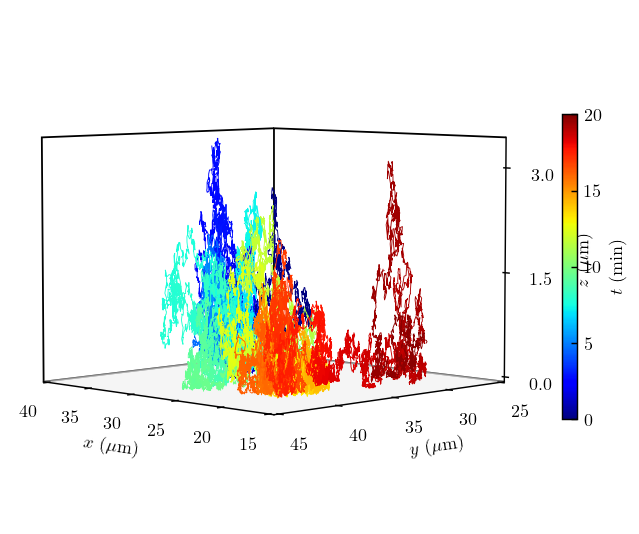

In [62]:
from matplotlib.ticker import MultipleLocator
N = 200
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(cm2inch(16), cm2inch(10)))
#plt.figaspect(0.21)*1.5
ax = fig.gca(projection='3d')
ax.pbaspect = [1, 20/25, 3/25*4]
ax.ticklabel_format(style = "sci")
for i in range(N-1):
    ax.plot(x[i*360:i*360+360], y[i*360:i*360+360], z[i*360:i*360+360], color=plt.cm.jet(1*i/N), linewidth = 0.5)


norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
ax = plt.gca()
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.rcParams['grid.color'] = "gray"
ax.grid(False)
ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
#ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})


ax.set_ylim([25,45])
ax.set_xlim([15,40])

plt.xticks([15,20,25,30,35,40])
plt.yticks([25,30,35,40,45])
ax.set_zticks([0,1.5,3])


plt.xlabel("$x$ ($\mathrm{\mu m}$)",fontsize = "medium",)
plt.ylabel("$y$ ($\mathrm{\mu m}$)",fontsize = "medium",)
ax.set_zlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "medium",)

#ax.view_init(10,45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False



#[t.set_va('center') for t in ax.get_yticklabels()]
#[t.set_ha('left') for t in ax.get_yticklabels()]
#[t.set_va('center') for t in ax.get_xticklabels()]
#[t.set_ha('right') for t in ax.get_xticklabels()]
#[t.set_va('center') for t in ax.get_zticklabels()]
#[t.set_ha('left') for t in ax.get_zticklabels()]



#ax.xaxis._axinfo['tick']['inward_factor'] = 0
#ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
#ax.yaxis._axinfo['tick']['inward_factor'] = 0
#ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
#ax.zaxis._axinfo['tick']['inward_factor'] = 0
#ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
#ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

ax.view_init(elev=5, azim=135)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.zaxis.set_major_locator(MultipleLocator())



ticks_c = []
for i in np.linspace(0,1,5):
    ticks_c.append("{:.0f}".format(N*360*i/60/60))
cbar = plt.colorbar(sm, ticks=np.linspace(0,1,5), format = "%.1f", shrink = 0.6)
cbar.set_ticklabels(ticks_c)
cbar.set_label("$t$ (min)",)


plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1)
plt.savefig("traj.svg")

In [30]:
dir(ax)

['M',
 '_3d_extend_contour',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autoscaleZon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis3don',
 '_axisbelow',
 '_button_press',
 '_button_release',
 '_cids',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_determine_lims',
 '_draw_grid',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_generate_normals',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_ge

In [31]:
20/25*0.55

0.44000000000000006

In [32]:
ticks_c = []
for i in np.linspace(0,1,10):
    ticks_c.append("{:.0f} m".format(N*500*i/60/60))
ticks_c

['0 m', '3 m', '6 m', '9 m', '12 m', '15 m', '19 m', '22 m', '25 m', '28 m']

In [33]:
200*360

72000

/home/expensia/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:117: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


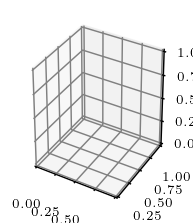

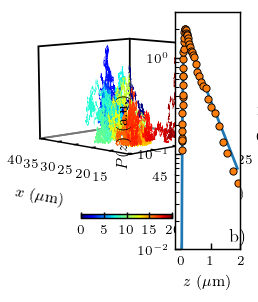

In [42]:
fig = plt.figure(figsize=(cm2inch(8.6), 1*cm2inch(8.6)/1.68),constrained_layout=False)
gs = fig.add_gridspec(1,10)

fig.add_subplot(gs[0,0:5], projection='3d')

N = 200
cmap = plt.get_cmap('jet')
ax = plt.gca()
ax.ticklabel_format(style = "sci")

ax.pbaspect = [1, 15/25, 0.25/25*4]


for i in range(N-1):
    ax.plot(x[i*500:i*500+500], y[i*500:i*500+500], z[i*500:i*500+500], color=plt.cm.jet(1*i/N), linewidth = 0.2)
    
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
ax = plt.gca()
ax.pbaspect = [1, 20/25, 3/25*4]

plt.xlabel("x [$\mathrm{\mu m}$]")
plt.ylabel("y [$\mathrm{\mu m}$]")
ax.set_zlabel("z [$\mathrm{\mu m}$]")
ax.grid(False)
#ax.view_init(30, -10)
#ax.view_init(20, -1)



ticks_c = []
for i in np.linspace(0,1,10):
    ticks_c.append("{:.0f} min".format(N*500*i/60/60))
cbar = plt.colorbar(sm, ticks=np.linspace(0,1,10), format = "%.1f",orientation='horizontal')
cbar.set_ticklabels(ticks_c)



#########


fig.add_subplot(gs[0,7:])

plt.plot(dataset["x_pdf_z"] * 1e6,dataset["Pb_th"])
plt.semilogy(dataset["x_pdf_z"] * 1e6 - dataset["offset_B"],dataset["pdf_z"], "o", markersize = 4)

plt.xlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "small")
plt.ylabel("$P(z)$ (a.u.)",fontsize = "small")

ax = plt.gca()
ax.set_ylim([1e-2,3])
ax.set_xlim([-0.2,1])
plt.xticks([0,1,2])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()



plt.text(0.8*xmax,1.2*ymin,'b)')

plt.tight_layout(pad = 0.01)
plt.savefig("viscosityxpdfz.pdf")

/home/expensia/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


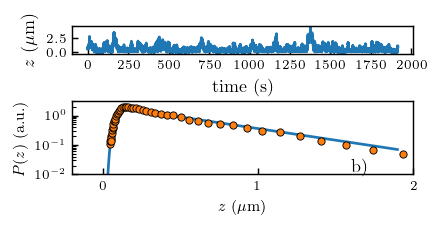

In [35]:
fig = plt.figure(figsize=(cm2inch(8.6), 0.75*cm2inch(8.6)/1.68),constrained_layout=False)
gs = fig.add_gridspec(10,1)

fig.add_subplot(gs[0:2,0])

plt.plot(np.arange(len(z))/60,z)
plt.xlabel("time (s)")
plt.ylabel("$z$  ($\mathrm{\mu m}$)")

#########


fig.add_subplot(gs[5:,0])

plt.plot(dataset["x_pdf_z"] * 1e6,dataset["Pb_th"])
plt.semilogy(dataset["x_pdf_z"] * 1e6 - dataset["offset_B"],dataset["pdf_z"], "o", markersize = 4)

plt.xlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "small")
plt.ylabel("$P(z)$ (a.u.)",fontsize = "small")

ax = plt.gca()
ax.set_ylim([1e-2,3])
ax.set_xlim([-0.2,1])
plt.xticks([0,1,2])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()



plt.text(0.8*xmax,1.2*ymin,'b)')

plt.tight_layout(pad = 0.01,h_pad=0.001, w_pad=0.1)

plt.savefig("viscosityxpdfz.pdf")

In [36]:
bins_center

array([0.01413705, 0.04241116, 0.07068526, 0.09895936, 0.12723347,
       0.15550757, 0.18378168, 0.21205578, 0.24032988, 0.26860399,
       0.29687809, 0.3251522 , 0.3534263 , 0.3817004 , 0.40997451,
       0.43824861, 0.46652271, 0.49479682, 0.52307092, 0.55134503,
       0.57961913, 0.60789323, 0.63616734, 0.66444144, 0.69271555,
       0.72098965, 0.74926375, 0.77753786, 0.80581196, 0.83408607,
       0.86236017, 0.89063427, 0.91890838, 0.94718248, 0.97545659,
       1.00373069, 1.03200479, 1.0602789 , 1.088553  , 1.11682711,
       1.14510121, 1.17337531, 1.20164942, 1.22992352, 1.25819762,
       1.28647173, 1.31474583, 1.34301994, 1.37129404, 1.39956814,
       1.42784225, 1.45611635, 1.48439046, 1.51266456, 1.54093866,
       1.56921277, 1.59748687, 1.62576098, 1.65403508, 1.68230918,
       1.71058329, 1.73885739, 1.7671315 , 1.7954056 , 1.8236797 ,
       1.85195381, 1.88022791, 1.90850202, 1.93677612, 1.96505022,
       1.99332433, 2.02159843, 2.04987253, 2.07814664, 2.10642

In [37]:
dataset["B"]

array(17.41896411)

In [38]:
t = np.arange(len(z))/60

KeyError: 'gaussia_short_timetheory'

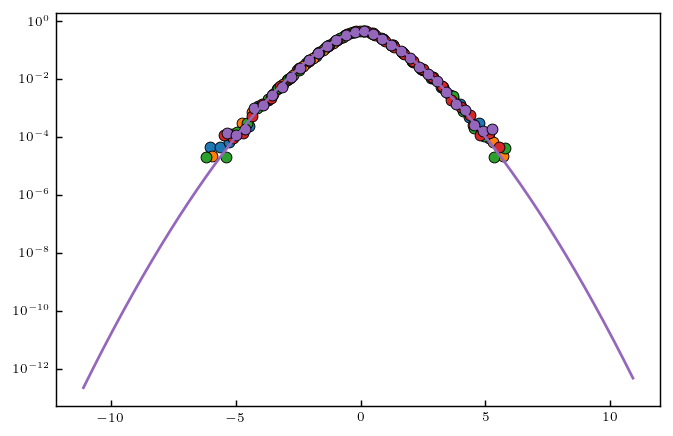

In [39]:
for n,i in enumerate(['pdf_Dz_short_t_1', 'pdf_Dz_short_t_2', 'pdf_Dz_short_t_3', 'pdf_Dz_short_t_4', 'pdf_Dz_short_t_5']):
    plt.semilogy(dataset[i][0,:],dataset[i][1,:], color = color[n], marker =  "o", linestyle = "",markersize = 6)

    
plt.plot(dataset["pdf_Dz_short_th_t_5"][0,:],dataset["pdf_Dz_short_th_t_5"][1,:], color = color[4])
plt.plot(dataset["gaussia_short_timetheory"][0,:],dataset["gaussia_short_timetheory"][1,:], color = "gray",linestyle = "--")

ax = plt.gca()

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())




ax.set_ylim([1e-5,3])
ax.set_xlim([-7,7])
plt.xlabel("$\Delta z / \sigma$",fontsize = "small")
plt.ylabel("$P(\Delta z / \sigma)$",fontsize = "small")

ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()


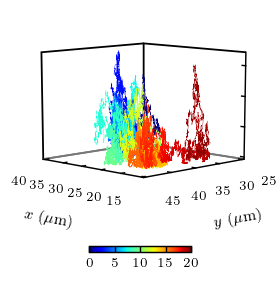

In [40]:
from matplotlib.ticker import MultipleLocator
N = 200
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(cm2inch(8.6)/1.5, 1.2*cm2inch(8.6)/1.68))
#plt.figaspect(0.21)*1.5
ax = fig.gca(projection='3d')
ax.pbaspect = [1, 20/25, 3/25*4]
ax.ticklabel_format(style = "sci")
for i in range(N-1):
    ax.plot(x[i*360:i*360+360], y[i*360:i*360+360], z[i*360:i*360+360], color=plt.cm.jet(1*i/N), linewidth = 0.2)


norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
ax = plt.gca()
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.rcParams['grid.color'] = "gray"
ax.grid(False)
#ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
#ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
#ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})


ax.set_ylim([25,45])
ax.set_xlim([15,40])

#plt.xticks([20,30,40])
#plt.yticks([30,35,40])
#ax.set_zticks([0,1.5,3])


plt.xlabel("$x$ ($\mathrm{\mu m}$)",fontsize = "small")
plt.ylabel("$y$ ($\mathrm{\mu m}$)",fontsize = "small")
ax.set_zlabel("$z$ ($\mathrm{\mu m}$)",fontsize = "small")
#ax.view_init(10,45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False



[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('left') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('right') for t in ax.get_xticklabels()]
[t.set_va('center') for t in ax.get_zticklabels()]
[t.set_ha('left') for t in ax.get_zticklabels()]



ax.xaxis._axinfo['tick']['inward_factor'] = 0
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0
ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['inward_factor'] = 0
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

ax.view_init(elev=10, azim=135)
#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.zaxis.set_major_locator(MultipleLocator())



ticks_c = []
for i in np.linspace(0,1,5):
    ticks_c.append("{:.0f}".format(N*360*i/60/60))
cbar = plt.colorbar(sm, ticks=np.linspace(0,1,5), format = "%.1f",shrink = 0.4,orientation='horizontal')
cbar.set_ticklabels(ticks_c)
plt.tight_layout(h_pad=0.1)
plt.savefig("traj.svg")